In [2]:
%load_ext autoreload 
%autoreload 2

%reload_ext autoreload

import numpy as np 
from week1 import * 
from function_4 import * 
from function_5 import * 
R1 = np.eye(3) 
R2 = np.eye(3)
t1 = np.array([0,0,1]) 
t2 = np.array([0,0,20]) 

K1 = np.array([[700,0,600],[0,700,400],[0,0,1]])
K2 = K1 
Q = np.array([1,1,0]) 


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Exercise 5.1
What are the projection matrices P 1 and P 2?.
What is the projection of Q in cameras one and two (q1 and q2
)?

In [3]:
P1 = K1 @ np.column_stack((R1,t1)) 
P2 = K2 @ np.column_stack((R2,t2)) 

q1_1 = Pi(P1 @ PiInv(Q))
q1_2 = Pi(P2 @ PiInv(Q) )

print("Projection matrix 1:\n{}".format(P1.astype(int)))
print("\n")
print("Projection matrix 2:\n{}".format(P2.astype(int)))
print("\n\n")
print("Projection of Q in camera one:\n{}".format(q1_1.astype(int))) 
print("\n")
print("Projection of Q in camera two:\n{}".format(q1_2.astype(int))) 


Projection matrix 1:
[[700   0 600 600]
 [  0 700 400 400]
 [  0   0   1   1]]


Projection matrix 2:
[[  700     0   600 12000]
 [    0   700   400  8000]
 [    0     0     1    20]]



Projection of Q in camera one:
[1300 1100]


Projection of Q in camera two:
[635 435]


Exercise 5.2
1
To simulate noise in the detection of points, we add errors to our projections.
q˜1 = q1 +
h
1 −1
iT
, q˜2 = q2 +
h
1 −1
iT
.
Use your function triangulate from week 3 to triangulate Q from [q˜1
, q˜2
] and [P 1, P 2].
Take the newly triangulated point Q˜ and re-project it to the cameras. How far is it from our
observations of the point (q˜1
, q˜2
)? In other words, what is the reprojection error for each camera?
Is this as you expected when recalling the lecture from week 3?
How far is Q˜ from Q?

In [4]:
q1_tilde = (q1_1 + np.array([[1,-1]])).reshape(2,1)
q2_tilde = (q1_2 + np.array([[1,-1]])).reshape(2,1)





def triangulate(qn,pn):

    """ Input 
        Q: list of n pixel coordinates (q1,q2,...qn)
        Pn: list of n projection matrices 
        output: triangulation of the 3d point
    """
    
    if len(qn) != len(pn):
        raise ValueError("Expected lists of equal length, len(Q)!=len(pn)")

    
    B_i = lambda P,q: np.array([  [P[2]*q[0] - P[0]],[P[2]*q[1] - P[1]] ])

    B = np.array((([B_i(P_i,q_i) for P_i, q_i in zip(pn,qn)])))

    B = B.reshape(len(pn)*2,4)

    U,S,VT = np.linalg.svd(B)

    Q = VT[-1,:].T
    return Q

In [5]:
Q_tilde = triangulate([q1_tilde,q2_tilde],[P1,P2])
print("Q_tilde: \n {}".format(Pi(Q_tilde).astype(float)))

Q_tilde: 
 [1.01527507e+00 9.85270570e-01 2.85786810e-04]


In [6]:
q1_reprojected = (Pi(P1 @ Q_tilde)).reshape(2,1)
q2_reprojected = (Pi(P2 @ Q_tilde)).reshape(2,1)


dist = np.linalg.norm(Q -Pi(Q_tilde))


print(RMSE(q1_reprojected,q1_tilde))
print(RMSE(q2_reprojected,q2_tilde))
print("\n")
print("The distance between the projected point Q and Q_tilde: {}".format(dist))


13.433018988192185
0.6717725840472986


The distance between the projected point Q and Q_tilde: 0.02122181735338129


Exercise 5.3

In [7]:
from function_5 import * 

Q_hat = triangulate_nonlinear([q1_tilde,q2_tilde],[P1,P2]).x
Q_hat

array([1.00153897e+00, 9.98546318e-01, 4.27447130e-05])

# Exercise 5.4 


In [7]:
Q_hat

array([1.00153897e+00, 9.98546318e-01, 4.27447130e-05])

In [8]:
RMSE(Q.reshape(3,1),Q_hat.reshape(3,1))

0.002117415036096848

In [9]:
repro_c1 = P1 @ PiInv(Q_hat) 
err1 = RMSE((Pi(repro_c1)).reshape(2,1),q1_tilde.reshape(2,1))

repro_c2 = P2 @ PiInv(Q_hat) 
err2 = RMSE((Pi(repro_c2)).reshape(2,1),q2_tilde.reshape(2,1))

print("Reprojection error camera one: {}\n".format(err1))
print("Reprojection error camera two: {}\n".format(err2))

Reprojection error camera one: 0.06701026550758044

Reprojection error camera two: 1.34015086706421



Camera calibration with OpenCV

Exercise 5.5

Take photos of checkerboard from different anlges

Exercise 5.6


Transfer the images to your computer and load them into Python.
Check that all images have the same dimensions, to see if it has rotated some of them inadvertently,
and discard these images.
Why is it a problem for the camera calibration if two images are rotated(in software) differently
by the camera (for example portrait and landscape)?

In [10]:
import os 
import cv2 

directory = "checkerboard" 

imgs = [cv2.imread(directory + "/" + file) for file in os.listdir(directory)]

for img in imgs:
    print(img.shape)


(4032, 3024, 3)
(4032, 3024, 3)
(4032, 3024, 3)
(4032, 3024, 3)
(4032, 3024, 3)
(4032, 3024, 3)
(4032, 3024, 3)
(4032, 3024, 3)
(4032, 3024, 3)
(4032, 3024, 3)
(4032, 3024, 3)


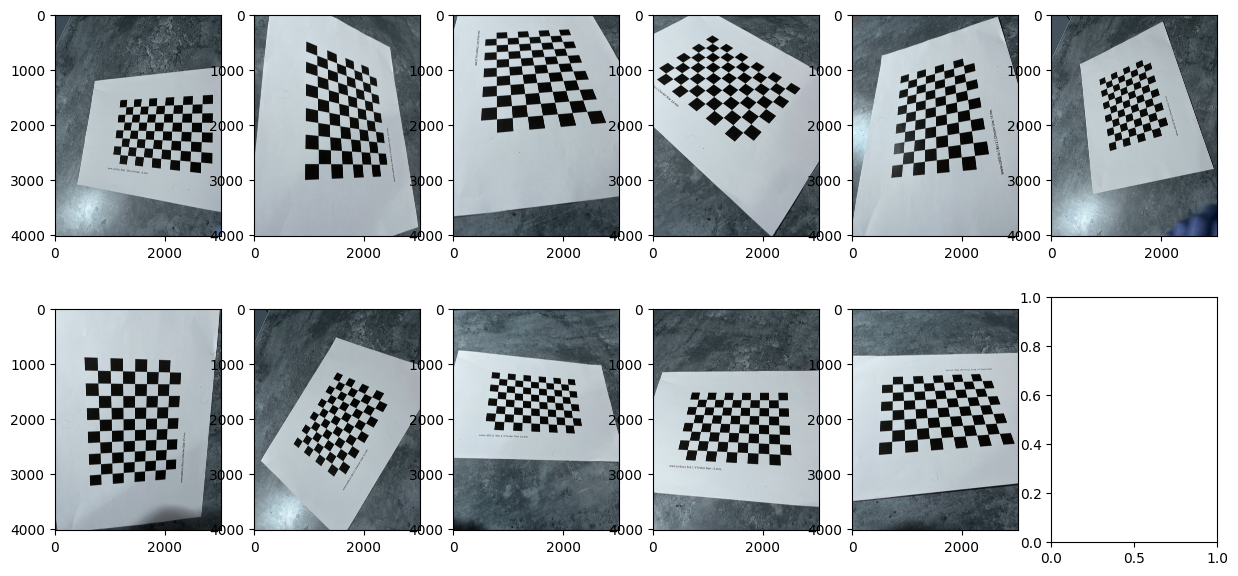

In [11]:
import matplotlib.pyplot as plt 
import math 

rows = 2 
cols = math.ceil(len(imgs)/2)

fig,ax = plt.subplots(rows,cols,figsize=(15,7))

idx = 0 

for row in range(0,rows):

    for col in range(0,cols):

        if idx< len(imgs):
            ax[row,col].imshow(imgs[idx])
            idx+=1
        else:
            break



plt.show()

#### Why is it a problem for the camera calibration if two images are rotated(in software) differently by the camera (for example portrait and landscape)?
* If two images are rotated in software, we will get an inacurate projection matrix  P = K [R t ]


## Exercise 5.7

In [12]:
def detect_corners(img):

    im_gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    ret,cor = cv2.findChessboardCorners(im_gray,(7,10),None)

    return ret,cor 


def draw_corners(cor,img,ret):

    img = cv2.drawChessboardCorners(img,(7,10),cor,ret)
    cv2.imshow("Chessboard",img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()


def detect_and_draw(img):
    im_small = cv2.resize(img, None, fx=0.25, fy=0.25)

    ret,cor = detect_corners(im_small) 

    if ret == True: 
        draw_corners(cor,im_small,ret)

    return cor

In [58]:
im_small = cv2.resize(imgs[0], None, fx=0.25, fy=0.25)
objpoints = [] 
imgpoints = []

for img in imgs:

    ret,cor = detect_corners(img)

    if ret == True: 
        
        imgpoints.append(cor) 
        objpoint = checkerboard_points(10,7).T 
        objpoint = objpoint.astype('float32')
        objpoints.append(objpoint)


#qs = PiInv(cor.reshape(2,70))
#Q = checkerboard_points(7,10)

In [62]:
flags = cv2.CALIB_FIX_K1+cv2.CALIB_FIX_K2+cv2.CALIB_FIX_K3+cv2.CALIB_FIX_K4+cv2.CALIB_FIX_K5+cv2.CALIB_FIX_K6+cv2.CALIB_ZERO_TANGENT_DIST

im_gry = cv2.cvtColor(imgs[0],cv2.COLOR_BGR2GRAY)

ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints,imgpoints,im_gry.shape[::-1],flags,None,None)


#### Inspect the K matrix. Is the principal point approximately in the center of your images?

In [73]:
#The principal point can be inspected from the coordinate of the camera matrix 
# As expected the prinicpal points are approximatly in the center of the matrix.

fx_est,fy_est = mtx.astype(int)[0][2],mtx.astype(int)[1][2]

print(im_gry.shape[1]/2,im_gry.shape[0]/2)
print(fx_est,fy_est)

1512.0 2016.0
1503 2010


### Exercise 5.9
##### Reproject the checkerboard corners to the images. You can use your projectpoints function from week 2

In [155]:
rotations = list(map(lambda x: cv2.Rodrigues(x)[0],rvecs))

Errors = [] 
reprojected_points = []

for r,t,Q,q in zip(rotations,tvecs,objpoints,imgpoints):
    
    reprojected_point = project_points(mtx,r,t,Q.T)
    
    reprojected_points.append(reprojected_point)

    epsilon = RMSE(reprojected_point,q.reshape(-1,2).T)
    Errors.append(epsilon)

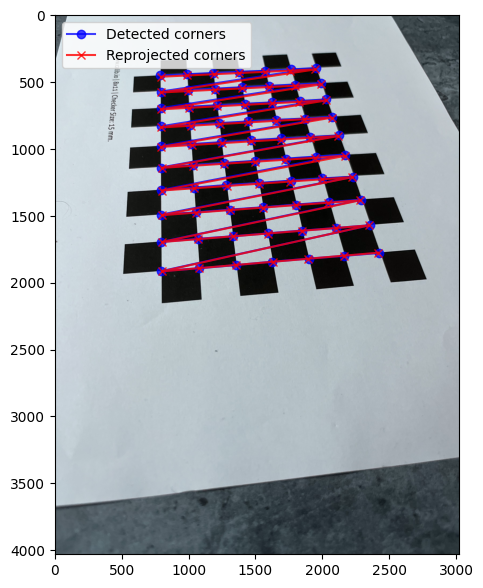

In [179]:
indx = np.argmax(Errors) # Index of the highest RMSE 

imgpoint_high = imgpoints[indx].reshape(-1,2)
reprojected_high = reprojected_points[indx].T

fig,ax = plt.subplots(1,1 ,figsize=(10,7)) 
plt.imshow(imgs[indx])

plt.plot(imgpoint_high[:,0],imgpoint_high[:,1],c = 'blue', marker='o',alpha=0.75,label="Detected corners")
plt.plot(reprojected_high[:,0],reprojected_high[:,1],c = 'red' , marker='x',alpha=0.80,label="Reprojected corners")

plt.legend()


### Exercise 5.10
#### Using the box3d function from week 1, create a new set of points like so

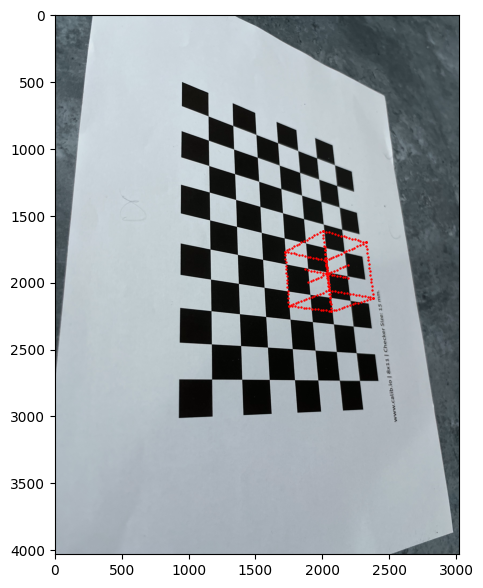

In [207]:
Q = 2*box3d() + 1

pq = (project_points(mtx,rotations[1],tvecs[1],Q)).T


fig,ax = plt.subplots(1,1 ,figsize=(10,7)) 

plt.imshow(imgs[1])
plt.scatter(pq[:,0],pq[:,1],c = 'red',s=0.5)
plt.show()

### Exercise 5.11
##### Do the camera calibration again, this time allowing the first order distortion coefficient k1.
* Do you get a lower reprojection error? 
* If your camera has visible lens distortion, try using the function from week 2 to undistort one of your images.

In [222]:
flags = cv2.CALIB_FIX_K4+cv2.CALIB_FIX_K5+cv2.CALIB_FIX_K6+cv2.CALIB_ZERO_TANGENT_DIST

im_gry = cv2.cvtColor(imgs[0],cv2.COLOR_BGR2GRAY)

ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints,imgpoints,im_gry.shape[::-1],flags = flags,None,None)


rotations = list(map(lambda x: cv2.Rodrigues(x)[0],rvecs))

Errors_k1 = [] 
reprojected_points = []

for r,t,Q,q in zip(rotations,tvecs,objpoints,imgpoints):
    
    reprojected_point = project_points(mtx,r,t,Q.T)
    
    reprojected_points.append(reprojected_point)

    epsilon = RMSE(reprojected_point,q.reshape(-1,2).T)
    Errors_k1.append(epsilon)


SyntaxError: positional argument follows keyword argument (571885213.py, line 5)

In [221]:
comparison_result = [errors_k1 < error for errors_k1, error in zip(Errors_k1, Errors)]

print(comparison_result)

[False, False, False, False, False, False, False, False, False, False, False]


In [188]:
pq.shape

(2, 240)